In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
#aggiunte io:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [50]:
#data = pd.read_csv('../data/MushroomDataset/processed_secondary_data.csv')

#dataset after dropping redundant features
data = pd.read_csv('../data/MushroomDataset/processed_secondary_data_after_analysis.csv')

Poisonous mushrooms have a class of "1", edible "0".

In [51]:
X = data.drop(columns=['class'])
y = data['class']

## Train-test split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [53]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [54]:
y_pred = model.predict(X_test)

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7777959718355985
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      5436
           1       0.80      0.80      0.80      6778

    accuracy                           0.78     12214
   macro avg       0.78      0.78      0.78     12214
weighted avg       0.78      0.78      0.78     12214

Confusion Matrix:
 [[4087 1349]
 [1365 5413]]


In [56]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8593439070828425


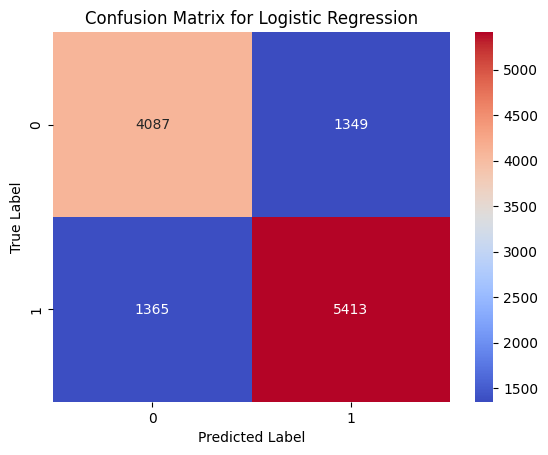

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Applying GridSearch to find best hyperparameters

In [58]:
parameter_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    ]

# Grid Search with 5-fold Cross-Validation

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=5000),
    param_grid=parameter_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # displaying the process
)


#### Evaluating the best model

In [59]:
#fitting the model
grid_search_lr.fit(X_train, y_train)

#best parameters
best_params = grid_search_lr.best_params_
best_model = grid_search_lr.best_estimator_

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)
print("Solver used in the best model:", best_model.solver)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Set Accuracy: 0.7777959718355985
Solver used in the best model: lbfgs


#### For original dataset:
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy: 0.7777140985754053
Solver used in the best model: liblinear

#### For dataset without the redundant features
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Set Accuracy: 0.7769772392336662
Solver used in the best model: liblinear


# Random Forest Classifier


With max_depth set to none, it was overfitting, achieveing no fale positives and false negatives. With accuracy equaly to 1.0. With max_depth=10, accuracy of Accuracy: 0.9772 and for max_depth=7, accuaracy of 0.91 

In [60]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=7)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [61]:
y_pred_3= model3.predict(X_test)

Random Forest Results:
Accuracy: 0.9103
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      5436
           1       0.92      0.92      0.92      6778

    accuracy                           0.91     12214
   macro avg       0.91      0.91      0.91     12214
weighted avg       0.91      0.91      0.91     12214

Confusion Matrix:
 [[4860  576]
 [ 519 6259]]


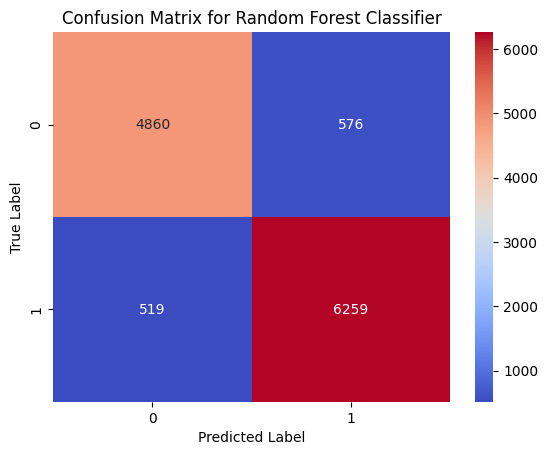

In [62]:
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3))

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

It seems our classifier achieved perfect accuracy, meaning there were no false positives or false negatives. 

In [63]:
y_prob_3 = model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_3)
print("ROC-AUC Score:", roc_auc_rf)

ROC-AUC Score: 0.8593439070828425


Since the accuracy is really high we need to check if the model is overfitting on the training set

In [64]:
#check test and train accuracies
train_accuracy_3 = accuracy_score(y_train, model3.predict(X_train))
test_accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"Training Accuracy: {train_accuracy_3:.4f}")
print(f"Test Accuracy: {test_accuracy_3:.4f}")

Training Accuracy: 0.9114
Test Accuracy: 0.9103


I evaluate the model using also the cross validation:

In [65]:
cv_scores = cross_val_score(model3, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.56549861 0.50720485 0.56656296 0.61986245 0.75395071]
Mean CV Accuracy: 0.6026


since Mean CV Accuracy is lower than the Test Accuracy the model is overfitting on the training set.

In [66]:
model3_limited = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,           
    min_samples_split=10,    
    min_samples_leaf=5       
)

model3_limited.fit(X_train, y_train)
y_pred_3_limited = model3_limited.predict(X_test)

Also with these parameters the model overfits on the training data:

In [67]:
print("Limited Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_3_limited):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_3_limited))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3_limited))

Limited Random Forest Results:
Accuracy: 0.9772
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      5436
           1       0.98      0.98      0.98      6778

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214

Confusion Matrix:
 [[5309  127]
 [ 152 6626]]


In [68]:
#check test and train accuracies
train_accuracy_lim = accuracy_score(y_train, model3_limited.predict(X_train))
test_accuracy_lim = accuracy_score(y_test, y_pred_3_limited)

print(f"Training Accuracy: {train_accuracy_lim:.4f}")
print(f"Test Accuracy: {test_accuracy_lim:.4f}")

# cross validation
cv_scores = cross_val_score(model3_limited, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Training Accuracy: 0.9782
Test Accuracy: 0.9772
Cross-Validation Scores: [0.52914688 0.49803504 0.59996725 0.57425905 0.76279374]
Mean CV Accuracy: 0.5928


### Grid search


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


KeyboardInterrupt: 

Results:

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5}
Best Accuracy: 0.6186304121975753


## Decision Tree Classifier

In [70]:
model2= DecisionTreeClassifier(criterion="entropy", random_state=42)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [71]:
y_pred2 = model2.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.9977075487145898
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

Confusion Matrix:
 [[5421   15]
 [  13 6765]]


In [ ]:
y_prob_2 = model2.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_2)
print("ROC-AUC Score:", roc_auc_dt)

ROC-AUC Score: 0.9976613240994596


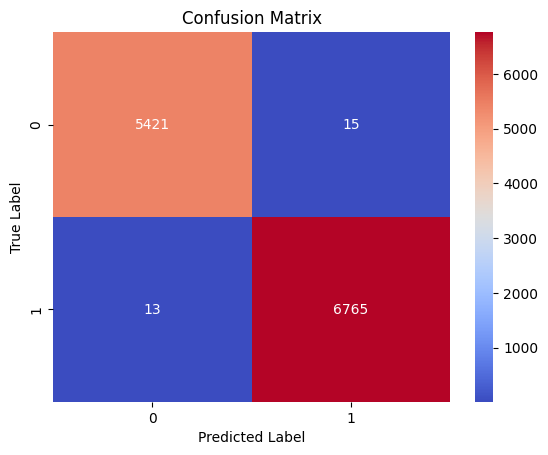

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

the model also overfits

In [ ]:
train_accuracy = accuracy_score(y_train, model2.predict(X_train))
test_accuracy = accuracy_score(y_test, model2.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:  
    print("Possible overfitting in the model.")
else:
    print("The model is balanced.")


Training Accuracy: 1.0000
Test Accuracy: 0.9977
The model is balanced.


The accuracy is high on both sets, which indicates that the model is generalizing well and could mean that the model is too complex, so I check the depth, which if it is very high means that it probably has memorized the training set

In [ ]:
print(model2.get_depth())  # depth
print(model2.get_n_leaves())  # N leaves

25
286


as I can see here:

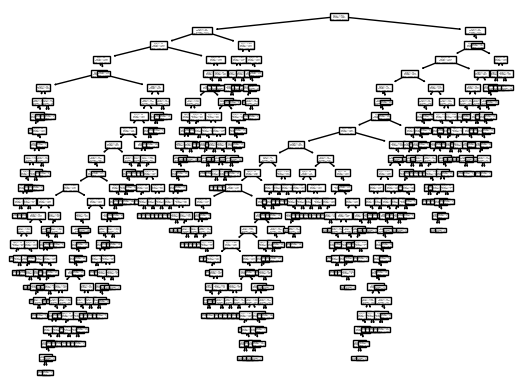

In [ ]:
_ = tree.plot_tree(model2)

These values indicate that the model is probably very complex. This could be a sign of overfitting.

We can check if the model is overfitting using the cross validation

In [ ]:
scores = cross_val_score(model2, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.49705256 0.49688882 0.63689209 0.52734567 0.66797675]
Mean CV Accuracy: 0.5652


Since the Mean CV Accuracy is lower than the Test Accuracy that was 0.9979, probably the model is overfitting on the training set

In [ ]:
# Grid Search per Decision Tree
param_grid_tree = {'max_depth': [5, 10, 15, 20, 25, None], 'min_samples_split': [2, 5, 10]}
grid_search_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search_tree.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Accuracy:", grid_search_tree.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best Accuracy: 0.9970934397707503


Result:

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}

Best Accuracy: 0.9970934397707503

## Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier(random_state=42)
clf_rfor = RandomForestClassifier(random_state=42)

In [ ]:
clf_voting_hard = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree), ('rf', clf_rfor)],
    voting='hard')
clf_voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

function to comprare accuracies of the three classifiers

In [ ]:
from typing import List
def compare_classifiers_accuracies(clfs: List[object], X_train, X_test, y_train, y_test):
    """Fit each classifier and compare their accuracies."""
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"{clf.__class__.__name__}:", accuracy_score(y_test, y_pred))


In [ ]:
compare_classifiers_accuracies([clf_logreg, clf_tree,clf_rfor, clf_voting_hard], X_train, X_test, y_train, y_test)

LogisticRegression: 0.7777959718355985
DecisionTreeClassifier: 0.9971344358932372
RandomForestClassifier: 1.0
VotingClassifier: 0.9986900278369084


with soft voting

In [ ]:
clf_voting_soft = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree)],
    voting='soft')
clf_voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [ ]:
compare_classifiers_accuracies([clf_logreg,  clf_tree, clf_rfor, clf_voting_soft], X_train, X_test, y_train, y_test)

LogisticRegression: 0.7777959718355985
DecisionTreeClassifier: 0.9971344358932372
RandomForestClassifier: 1.0
VotingClassifier: 0.9971344358932372


maybe we can do the pruning on the decision tree to have a max depth

# Support Vector Machine

In [72]:
from sklearn.svm import SVC

We try SVM with default parameters:

In [73]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_default = svm.predict(X_test)

In [74]:
accuracy_svm = accuracy_score(y_test, y_pred_default)
print(f"Accuracy SVM: {accuracy_svm:.4f}")

Accuracy SVM: 0.9997


Now we try using GridSearchCV to see if there's any improvement in the accuracy finding the best hyperparameters

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],         
    'gamma': [0.001, 0.01, 0.1, 1], 
    'kernel': ['rbf', 'linear']     
}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters for SVM:", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

it takes a lot :(

In [ ]:
# Evaluate gridsearchcv with svm on the test set
best_model_svm = grid_search.best_estimator_
y_pred_grid_svm = best_model.predict(X_test)
accuracy_grid_svm = accuracy_score(y_test, y_pred_grid_svm)
print(f"Accuracy SVM using GridSearchCV: {accuracy_grid_svm:.4f}")

I try to split the training set into training set and validation set and then apply the svm on the validation set to see how good it is and at the end apply the gridsearchcv on the validation set to see if the accuracy improves.

In [76]:
X_train_notfull, X_val, y_train_notfull, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [77]:
svm_val = SVC()  # svm with default parameters
svm_val.fit(X_train_notfull, y_train_notfull)
y_pred_val = svm_val.predict(X_val)

In [78]:
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy SVM on the Validation Set: {accuracy_val:.4f}")

Accuracy SVM on the Validation Set: 0.9996


Now we apply the GridSearchCV only on the Validation set to find the best hyperparameters:

In [79]:
param_grid_val = {
    'C': [0.1, 1, 10, 100],         
    'gamma': [0.001, 0.01, 0.1, 1], 
    'kernel': ['rbf', 'linear']     
}

grid_search_val = GridSearchCV(estimator=SVC(), param_grid=param_grid_val, cv=5, verbose=2, n_jobs=-1)
grid_search_val.fit(X_val, y_val)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

In [ ]:
print("Best parameters:", grid_search_val.best_params_)

In [ ]:
best_model_validation_set = grid_search_val.best_estimator_
y_pred_test_val = best_model_validation_set.predict(X_test) #predict on the test set with the best model found
accuracy_test_val = accuracy_score(y_test, y_pred_test_val) 
print(f"Accuracy SVM on the Test Set using GridSearch on the Validation Set): {accuracy_test_val:.4f}")

If th emodel overfits we can: <br>
 - standardise the data --> already done in the preprocessing part
 - reduce model complexity --> in RANDOM FOREST reduce the number of trees (n_estimators) or bound the maximum depth (max_depth), or I can use SVM with a linear kernel using c and gamma in a strict interval
 - use PCA to reduce dimensions --> already done
 - other models like K-Nearest Neighbors KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)

In [81]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy KNN (k=5): {accuracy_knn:.4f}")

Accuracy KNN (k=5): 0.7778


probably the simplest method like KNN and the Logistic regression who have the same accuracy 77% are avoiding the overfitting and they're generalizing better on the training set

Using sklearn we can try to regularize the Logistic Regression and the other models in order to be sure that they don't overfit.